# Mestrado 2023 - Implementações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/italy_regions.csv") 

cities = ['Lombardia', 'Lazio', 'Campania', 'Veneto', 'Sicilia']

city_name = 'Sicilia' #region 
indicator='ICU Admissions'

In [3]:
data.columns

Index(['Unnamed: 0', 'data', 'denominazione_regione', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'deceduti',
       'totale_casi', 'ingressi_terapia_intensiva'],
      dtype='object')

In [4]:
# Filtra região de interesse
data = data[data['denominazione_regione'] == city_name]

# Get daily indicator
daily_data = data['terapia_intensiva']

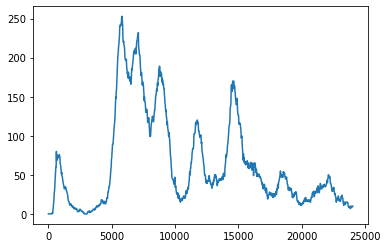

In [5]:
plt.plot(daily_data)

In [6]:
# Get cummulative indicator from daily data
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

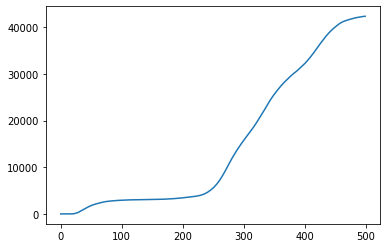

In [7]:
plt.plot(acc_data[:500])

In [8]:
# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

#scaling_factor = 1000
scaling_factor = max(acc_data)
#scaling_factor = 1

acc_data = np.array(acc_data) / scaling_factor
daily_data = list(daily_data/ scaling_factor)

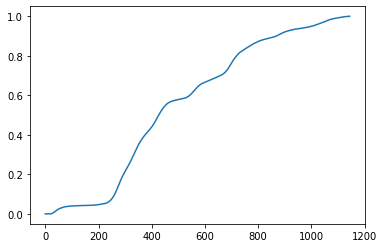

In [9]:
plt.plot(normalized_acc_data)

In [10]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

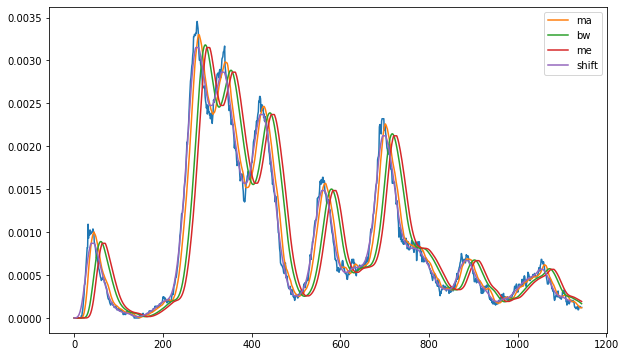

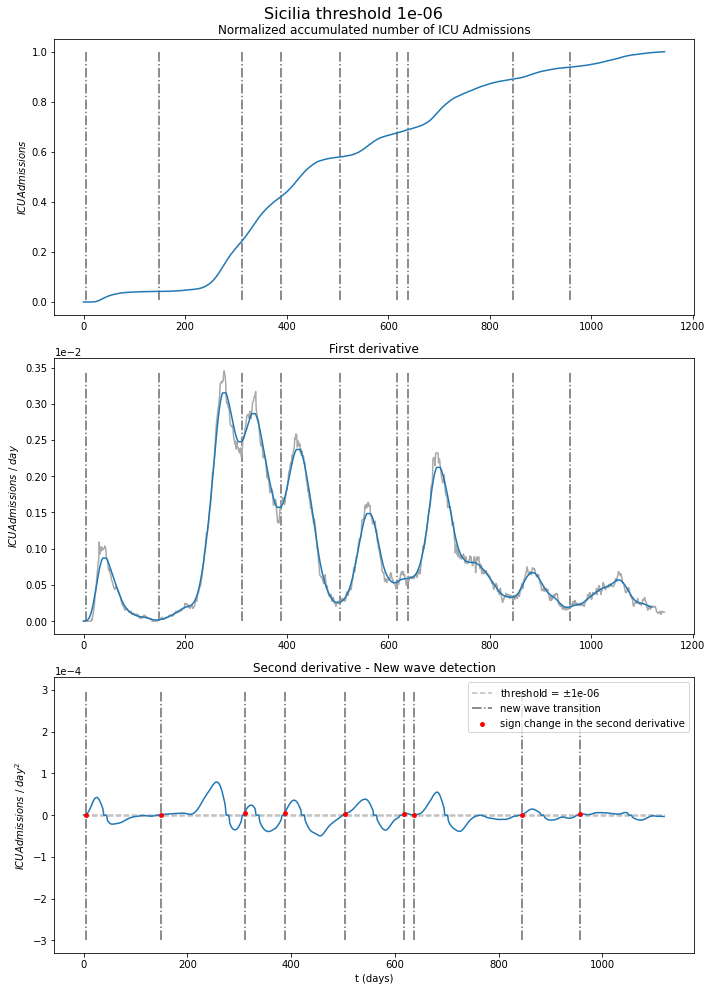

x_nw: [149, 312, 389, 505, 617, 638, 846, 957]


In [11]:
# Transition Points
x_nw = get_transition_points(scaling_factor*acc_data, visual=True, threshold=1e-6, indicator = indicator, city_name=city_name)
x_nw = x_nw[1:]

print('x_nw:', x_nw)

In [12]:
#x_nw = [189, 361, 532, 630, 865, 1144]

In [13]:
x_nw

[149, 312, 389, 505, 617, 638, 846, 957]

In [14]:
if (x_nw[-1] != len(acc_data) - 1):
    x_nw.append(len(acc_data) - 1)  

In [15]:
city_name

'Sicilia'

In [16]:
if (city_name == 'Lazio' or city_name == 'Lombardia'):
    x_nw = [189, 361, 532, 630, 865, 1144]
elif (city_name == 'Campania'):
    x_nw = [189, 361, 532, 621, 779, 852, 957]    
elif (city_name == 'Veneto'):
    x_nw = [126, 379, 512, 617, 804, 850]  
elif (city_name == 'Sicilia'):
    x_nw = [156, 320, 396, 513, 635, 852, 973] # com ITSE_norm e scaling_factor = 1000


In [19]:
x_nw = [149, 312, 389, 505, 617, 638, 846, 957]

### Ajuste do modelo utilizando ITSE_norm

Sigmoid #1 - A0:0.06803333357268393 | tp0:90.00000984494324 | delta0:33.75000962562323 | nu0:1.0 
RMSE: 0.007885794009488852 | Max(acc_data): 0.04216620695305459 | Rel. RMSE: 18.702
(optimal) Sigmoid #1 - A0:0.06803333357268393 | tp0:90.00000984494324 | delta0:33.75000962562323 | nu0:1.0 
Sigmoid #2 - A0:0.01852465301578706 | tp0:90.00002635141509 | delta0:33.75002477193045 | nu0:1.0 
RMSE: 0.045164927028544286 | Max(acc_data): 0.24137695605866127 | Rel. RMSE: 18.711
(optimal) Sigmoid #2 - A0:0.01852465301578706 | tp0:90.00002635141509 | delta0:33.75002477193045 | nu0:1.0 
Sigmoid #3 - A0:0.06191671022601163 | tp0:90.0000439674572 | delta0:33.75004240883129 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


RMSE: 0.020388664992666353 | Max(acc_data): 0.4195728759865636 | Rel. RMSE: 4.859
(optimal) Sigmoid #3 - A0:0.06191671022601163 | tp0:90.0000439674572 | delta0:33.75004240883129 | nu0:1.0 
Sigmoid #4 - A0:0.013227055898339547 | tp0:90.00005506873504 | delta0:33.7500543973394 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


RMSE: 0.04553032687898472 | Max(acc_data): 0.5792664609334462 | Rel. RMSE: 7.86
(optimal) Sigmoid #4 - A0:0.013227055898339547 | tp0:90.00005506873504 | delta0:33.7500543973394 | nu0:1.0 
Sigmoid #5 - A0:0.009841333639226764 | tp0:90.00005705901162 | delta0:33.75005636600782 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


RMSE: 0.03370930313800684 | Max(acc_data): 0.6748641341453423 | Rel. RMSE: 4.995
(optimal) Sigmoid #5 - A0:0.009841333639226764 | tp0:90.00005705901162 | delta0:33.75005636600782 | nu0:1.0 
Sigmoid #6 - A0:-5.204170427930421e-18 | tp0:90.0000580705007 | delta0:33.750057366859444 | nu0:1.0 
RMSE: 0.033407397751985216 | Max(acc_data): 0.687303711390884 | Rel. RMSE: 4.861
(optimal) Sigmoid #6 - A0:-5.204170427930421e-18 | tp0:90.0000580705007 | delta0:33.750057366859444 | nu0:1.0 
Sigmoid #7 - A0:0.017895944579479656 | tp0:90.00005989134225 | delta0:33.75005918078922 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


RMSE: 0.02878113626498499 | Max(acc_data): 0.8903924406696343 | Rel. RMSE: 3.232
(optimal) Sigmoid #7 - A0:0.017895944579479656 | tp0:90.00005989134225 | delta0:33.75005918078922 | nu0:1.0 
Sigmoid #8 - A0:6.938893903907228e-18 | tp0:90.00006126070657 | delta0:33.75006053999631 | nu0:1.0 
RMSE: 0.029261899352011927 | Max(acc_data): 0.9377474943332332 | Rel. RMSE: 3.12


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


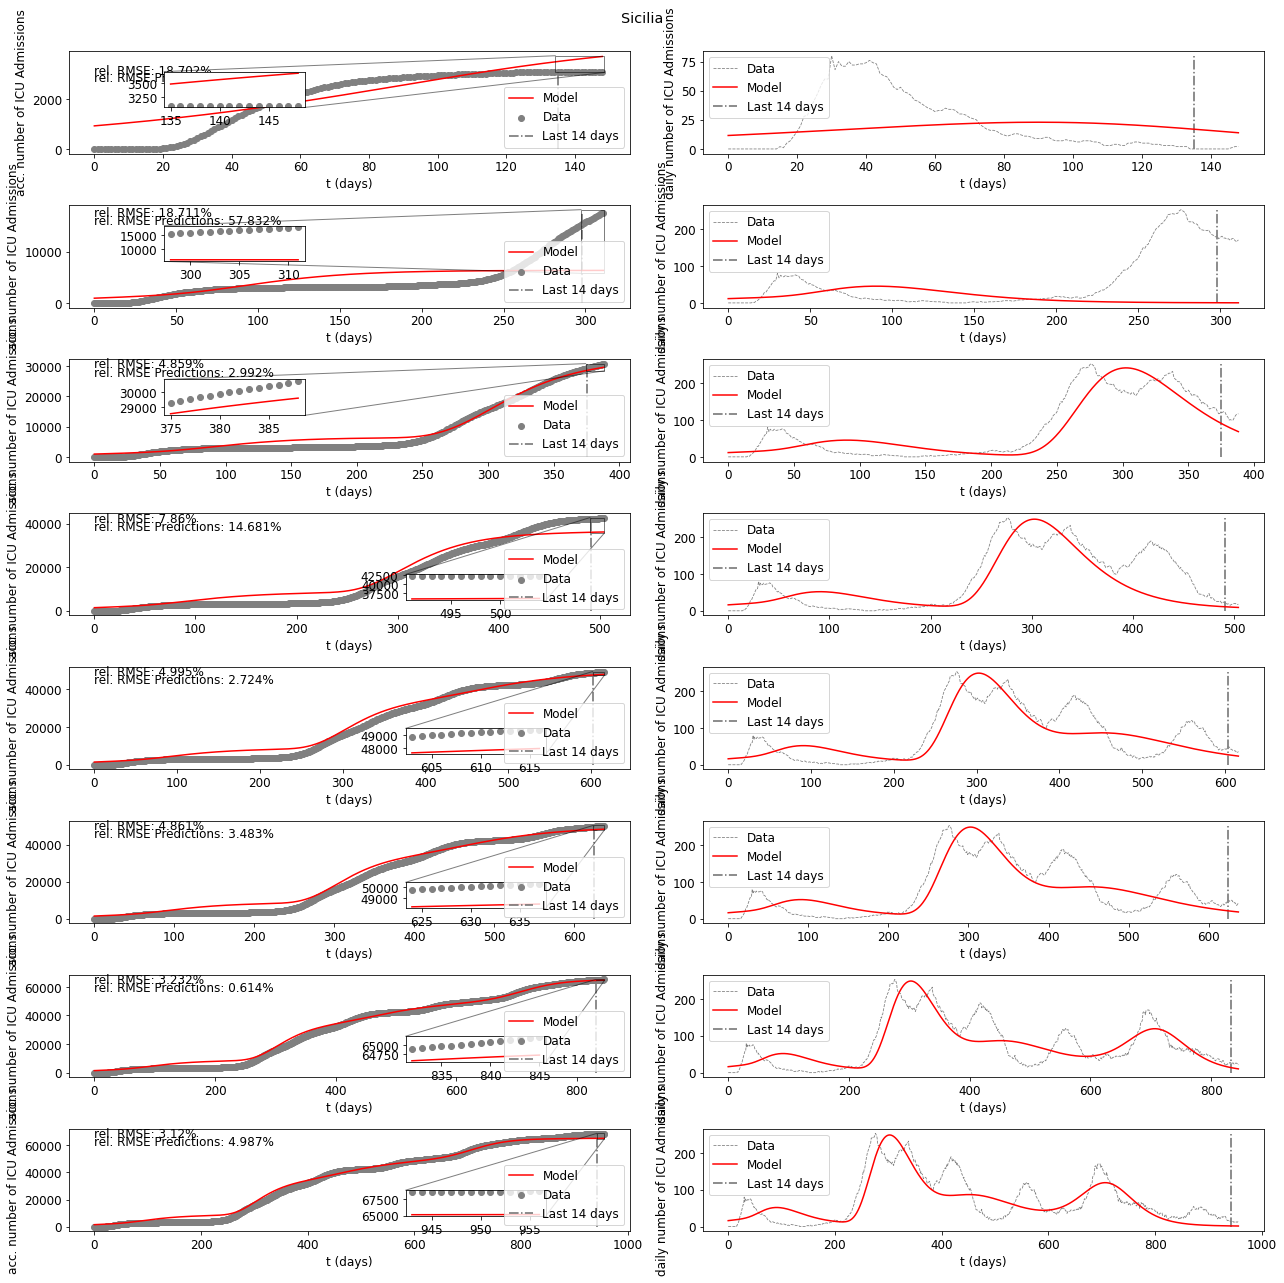

In [20]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'ITSE_norm'
                            )

In [18]:
data['data'].to_list()[1130]

'2023-03-30T17:00:00'